In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = "C:/Users/meets/Music/Opti-Price/final_data.csv"
df = pd.read_csv(file_path)

# Display basic info about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        50000 non-null  int64  
 1   email                              50000 non-null  object 
 2   phone_number                       50000 non-null  object 
 3   Date_of_Journey                    50000 non-null  object 
 4   departure_time                     50000 non-null  object 
 5   arrival_time                       50000 non-null  object 
 6   Departure                          50000 non-null  object 
 7   Destination                        50000 non-null  object 
 8   departure_airport                  50000 non-null  object 
 9   arrival_airport                    50000 non-null  object 
 10  hotel_check_in_date                50000 non-null  object 
 11  hotel_check_out_date               50000 non-null  obj

(None,
    customer_id                   email phone_number Date_of_Journey  \
 0       636354  user636354@example.com  +1-364-7883      2024-02-11   
 1       508907  user508907@example.com  +1-739-8336      2024-11-08   
 2       345754  user345754@example.com  +1-499-2619      2024-07-09   
 3       628555  user628555@example.com  +1-406-1626      2024-06-08   
 4       687849  user687849@example.com  +1-202-9294      2024-06-13   
 
   departure_time arrival_time    Departure Destination departure_airport  \
 0        7:10 PM     12:35 PM      Houston    New York               IAH   
 1        5:20 PM      3:04 AM  Los Angeles     Chicago               LAX   
 2        9:51 PM      4:14 AM        Miami     Houston               MIA   
 3       10:08 PM      8:18 AM        Dubai      Sydney               DXB   
 4        1:04 PM      1:00 AM      Chicago       Paris               ORD   
 
   arrival_airport  ... age  gender booking_source  special_requests  \
 0             JFK  ...

In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

special_requests    12626
dtype: int64

In [4]:
# Fill missing values in 'special_requests' with "None"
df['special_requests'].fillna("None", inplace=True)

# Verify if missing values are fixed
df.isnull().sum().sum()  # Should return 0 if all missing values are handled

C:\Users\meets\AppData\Local\Temp\ipykernel_16904\1403649946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['special_requests'].fillna("None", inplace=True)


0

In [5]:
df['special_requests'] = df['special_requests'].fillna("None")

In [6]:
# Convert date columns to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['hotel_check_in_date'] = pd.to_datetime(df['hotel_check_in_date'])
df['hotel_check_out_date'] = pd.to_datetime(df['hotel_check_out_date'])

# Extract additional features
df['journey_day'] = df['Date_of_Journey'].dt.day_name()  # Day of the week
df['journey_month'] = df['Date_of_Journey'].dt.month  # Month as a number

# Calculate stay duration (in days)
df['stay_duration'] = (df['hotel_check_out_date'] - df['hotel_check_in_date']).dt.days

# Display first few rows to verify changes
df[['Date_of_Journey', 'journey_day', 'journey_month', 'hotel_check_in_date', 'hotel_check_out_date', 'stay_duration']].head()

,Date_of_Journey,journey_day,journey_month,hotel_check_in_date,hotel_check_out_date,stay_duration
0,2024-02-11,Sunday,2,2024-02-11,2024-02-13,2
1,2024-11-08,Friday,11,2024-11-08,2024-11-09,1
2,2024-07-09,Tuesday,7,2024-07-09,2024-07-12,3
3,2024-06-08,Saturday,6,2024-06-08,2024-06-12,4
4,2024-06-13,Thursday,6,2024-06-13,2024-06-14,1


In [7]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoders = {}
categorical_cols = ['flight_class', 'room_type', 'season']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-Hot Encoding for unordered categories
df = pd.get_dummies(df, columns=['gender', 'booking_source', 'payment_method'], drop_first=True)

# Display first few rows after encoding
df.head()

,customer_id,email,phone_number,Date_of_Journey,departure_time,arrival_time,Departure,Destination,departure_airport,arrival_airport,...,dynamic_pricing_suggestion,journey_day,journey_month,stay_duration,gender_Male,booking_source_Travel Agent,booking_source_Walk-in,booking_source_Website,payment_method_Credit Card,payment_method_PayPal
0,636354,user636354@example.com,+1-364-7883,2024-02-11,7:10 PM,12:35 PM,Houston,New York,IAH,JFK,...,Keep Stable,Sunday,2,2,False,False,False,True,True,False
1,508907,user508907@example.com,+1-739-8336,2024-11-08,5:20 PM,3:04 AM,Los Angeles,Chicago,LAX,ORD,...,Keep Stable,Friday,11,1,True,False,False,True,True,False
2,345754,user345754@example.com,+1-499-2619,2024-07-09,9:51 PM,4:14 AM,Miami,Houston,MIA,IAH,...,Keep Stable,Tuesday,7,3,False,True,False,False,False,False
3,628555,user628555@example.com,+1-406-1626,2024-06-08,10:08 PM,8:18 AM,Dubai,Sydney,DXB,SYD,...,Increase Price,Saturday,6,4,False,False,False,True,False,True
4,687849,user687849@example.com,+1-202-9294,2024-06-13,1:04 PM,1:00 AM,Chicago,Paris,ORD,CDG,...,Keep Stable,Thursday,6,1,True,False,True,False,False,False


In [8]:
import pandas as pd

# Load the processed dataset
file_path = "C:/Users/meets/Music/Opti-Price/final_data.csv"
df = pd.read_csv(file_path)

# Check missing values
missing_values = df.isnull().sum()

# Get summary statistics for numerical columns
summary_stats = df.describe()

# Identify unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].nunique() for col in categorical_cols}

missing_values, summary_stats, unique_values

(customer_id                              0
 email                                    0
 phone_number                             0
 Date_of_Journey                          0
 departure_time                           0
 arrival_time                             0
 Departure                                0
 Destination                              0
 departure_airport                        0
 arrival_airport                          0
 hotel_check_in_date                      0
 hotel_check_out_date                     0
 hotel_country                            0
 ticket_price                             0
 hotel_price                              0
 total_spent                              0
 flight_class                             0
 room_type                                0
 payment_method                           0
 customer_name                            0
 age                                      0
 gender                                   0
 booking_source                 

In [9]:
import pandas as pd
import numpy as np

# --- Time-based Features ---
# Convert Date_of_Journey to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['is_weekend'] = df['Date_of_Journey'].dt.dayofweek >= 5  # Saturday(5) & Sunday(6)

# Categorize departure times into Morning, Afternoon, Evening, Night
def categorize_time(time_str):
    hour = int(time_str.split(':')[0])
    period = time_str[-2:]  # AM/PM
    if period == 'PM' and hour != 12:
        hour += 12
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['time_of_day'] = df['departure_time'].apply(categorize_time)

# Map seasons to numerical values
season_mapping = {"Spring": 1, "Summer": 2, "Autumn": 3, "Winter": 4}
df['season_encoded'] = df['season'].map(season_mapping)

# --- Customer Behavior Features ---
df['is_loyal_customer'] = df['previous_booking_count'] > 5
df['repeat_customer_discount'] = df['previous_booking_count'].apply(lambda x: 1 if x > 3 else 0)

# --- Price-based Features ---
df['price_ratio'] = df['ticket_price'] / df['average_ticket_price_last_30_days']
df['hotel_price_ratio'] = df['hotel_price'] / df['average_hotel_price_last_30_days']

# Verify the new columns
df[['is_weekend', 'time_of_day', 'season_encoded', 'is_loyal_customer', 
    'repeat_customer_discount', 'price_ratio', 'hotel_price_ratio']].head()

,is_weekend,time_of_day,season_encoded,is_loyal_customer,repeat_customer_discount,price_ratio,hotel_price_ratio
0,True,Evening,3,False,0,0.436579,0.724251
1,False,Evening,3,False,1,0.703508,0.789136
2,False,Night,1,True,1,4.946780,0.595752
3,True,Night,2,False,0,1.064850,0.363066
4,False,Afternoon,2,False,0,2.402346,1.068190


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
plt.style.use('ggplot')

In [12]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


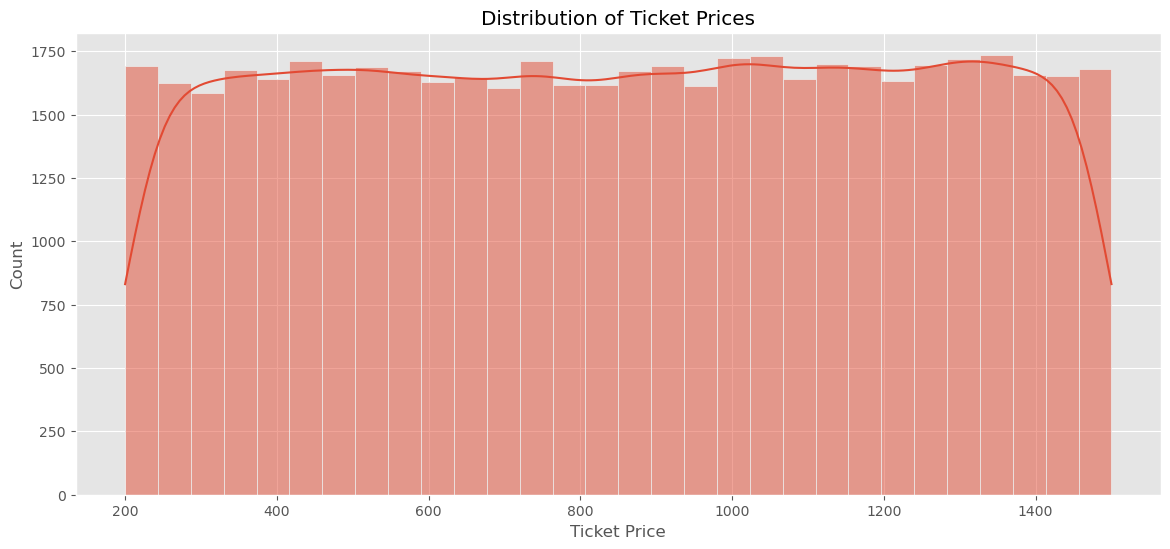

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # Use a valid style

# Example: Distribution of ticket prices
plt.figure(figsize=(14, 6))
sns.histplot(df['ticket_price'], bins=30, kde=True)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Ticket Price')
plt.ylabel('Count')
plt.show()

C:\Users\meets\AppData\Local\Temp\ipykernel_16904\1677270649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['time_of_day'], y=df['ticket_price'], palette='coolwarm')


Text(0, 0.5, 'Ticket Price')

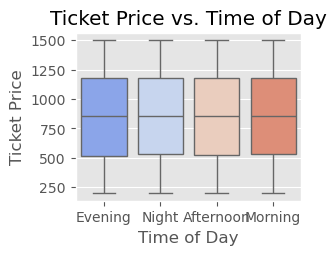

In [14]:
# Boxplot: Ticket Price vs. Time of Day
plt.subplot(2, 2, 1)
sns.boxplot(x=df['time_of_day'], y=df['ticket_price'], palette='coolwarm')
plt.title("Ticket Price vs. Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Ticket Price")

C:\Users\meets\AppData\Local\Temp\ipykernel_16904\281878837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['is_weekend'], y=df['hotel_price'], palette='coolwarm')


Text(0, 0.5, 'Hotel Price')

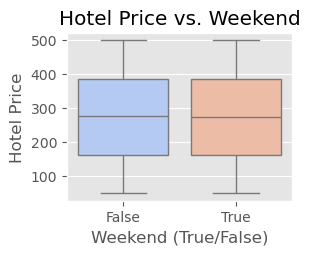

In [15]:
# Boxplot: Hotel Price vs. Weekend Status
plt.subplot(2, 2, 2)
sns.boxplot(x=df['is_weekend'], y=df['hotel_price'], palette='coolwarm')
plt.title("Hotel Price vs. Weekend")
plt.xlabel("Weekend (True/False)")
plt.ylabel("Hotel Price")

C:\Users\meets\AppData\Local\Temp\ipykernel_16904\1184762683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['dynamic_pricing_suggestion'], palette='viridis')


Text(0, 0.5, 'Count')

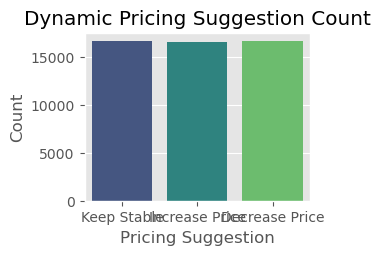

In [16]:
# Countplot: Dynamic Pricing Suggestion
plt.subplot(2, 2, 3)
sns.countplot(x=df['dynamic_pricing_suggestion'], palette='viridis')
plt.title("Dynamic Pricing Suggestion Count")
plt.xlabel("Pricing Suggestion")
plt.ylabel("Count")

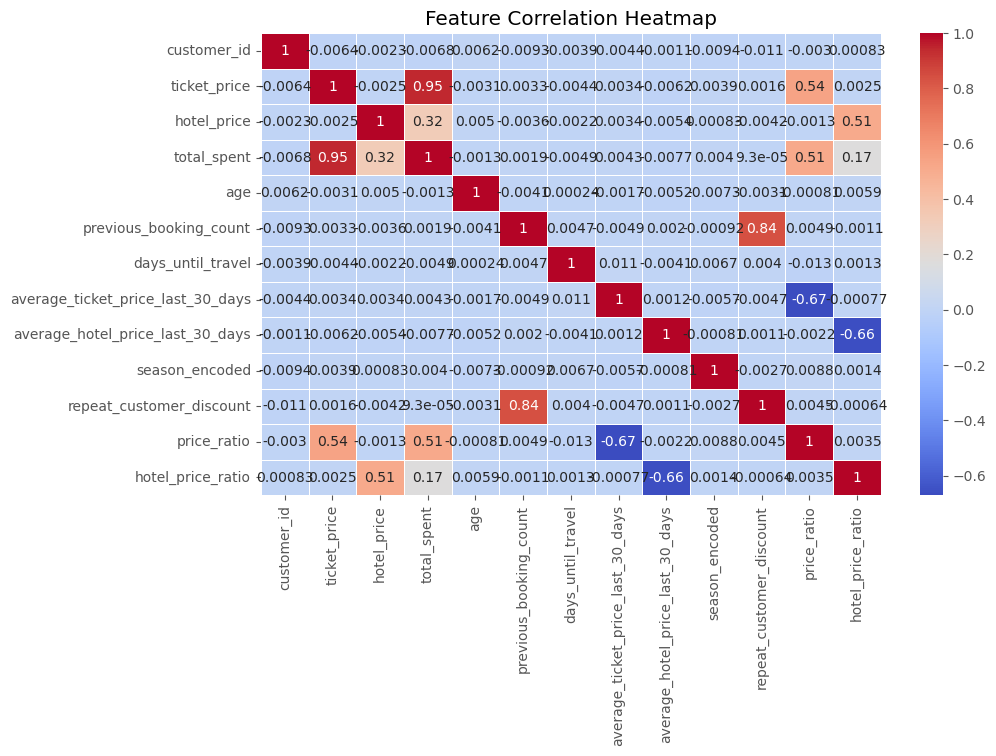

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Assuming df is the dataset
df = df.copy()

# ✅ Convert boolean columns to numeric (0 and 1)
df['is_weekend'] = df['is_weekend'].astype(int)
df['is_loyal_customer'] = df['is_loyal_customer'].astype(int)

# ✅ One-Hot Encoding for 'time_of_day'
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_time_of_day = encoder.fit_transform(df[['time_of_day']])
encoded_df = pd.DataFrame(encoded_time_of_day, columns=encoder.get_feature_names_out(['time_of_day']))

# Drop original 'time_of_day' and merge encoded features
df = df.drop(columns=['time_of_day'])
df = pd.concat([df, encoded_df], axis=1)

# ✅ Normalize numerical features
scaler = MinMaxScaler()
df[['price_ratio', 'hotel_price_ratio']] = scaler.fit_transform(df[['price_ratio', 'hotel_price_ratio']])

# ✅ Define target variable (Y) and features (X)
target = 'price_ratio'  # Assuming we predict price_ratio
X = df.drop(columns=[target])
Y = df[target]

# ✅ Train-Test Split (80-20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ✅ Print dataset shape after preprocessing
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (40000, 38)
Testing Data Shape: (10000, 38)


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Prepare Data for XGBoost
X = df.drop(columns=['ticket_price'])  # Assuming 'ticket_price' is the target variable
y = df['ticket_price']

In [21]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [24]:
plt.style.use('ggplot')  # Use a valid style

In [25]:
# Convert categorical columns to numeric using Label Encoding
categorical_columns = ['time_of_day', 'departure_time', 'arrival_time', 'Departure', 'Destination',
                       'departure_airport', 'arrival_airport', 'hotel_country', 'flight_class', 'room_type',
                       'payment_method', 'customer_name', 'gender', 'booking_source', 'special_requests', 'season',
                       'dynamic_pricing_suggestion']

label_encoders = {}
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
        label_encoders[col] = le

# Convert datetime columns to numeric features
if 'Date_of_Journey' in df.columns:
    df['journey_year'] = df['Date_of_Journey'].dt.year
    df['journey_month'] = df['Date_of_Journey'].dt.month
    df['journey_day'] = df['Date_of_Journey'].dt.day
    df.drop(columns=['Date_of_Journey'], inplace=True)
if 'hotel_check_in_date' in df.columns:
    df['check_in_year'] = pd.to_datetime(df['hotel_check_in_date']).dt.year
    df['check_in_month'] = pd.to_datetime(df['hotel_check_in_date']).dt.month
    df['check_in_day'] = pd.to_datetime(df['hotel_check_in_date']).dt.day
    df.drop(columns=['hotel_check_in_date'], inplace=True)
if 'hotel_check_out_date' in df.columns:
    df['check_out_year'] = pd.to_datetime(df['hotel_check_out_date']).dt.year
    df['check_out_month'] = pd.to_datetime(df['hotel_check_out_date']).dt.month
    df['check_out_day'] = pd.to_datetime(df['hotel_check_out_date']).dt.day
    df.drop(columns=['hotel_check_out_date'], inplace=True)


In [26]:
# Set figure size
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [27]:
print(df.columns)  # Check available columns

Index(['customer_id', 'email', 'phone_number', 'departure_time',
       'arrival_time', 'Departure', 'Destination', 'departure_airport',
       'arrival_airport', 'hotel_country', 'ticket_price', 'hotel_price',
       'total_spent', 'flight_class', 'room_type', 'payment_method',
       'customer_name', 'age', 'gender', 'booking_source', 'special_requests',
       'previous_booking_count', 'season', 'days_until_travel',
       'average_ticket_price_last_30_days', 'average_hotel_price_last_30_days',
       'dynamic_pricing_suggestion', 'is_weekend', 'season_encoded',
       'is_loyal_customer', 'repeat_customer_discount', 'price_ratio',
       'hotel_price_ratio', 'time_of_day_Evening', 'time_of_day_Morning',
       'time_of_day_Night', 'journey_year', 'journey_month', 'journey_day',
       'check_in_year', 'check_in_month', 'check_in_day', 'check_out_year',
       'check_out_month', 'check_out_day'],
      dtype='object')


In [28]:
print(df.head())  # Check if 'time_of_day' is present and correctly transformed

   customer_id                   email phone_number  departure_time  \
0       636354  user636354@example.com  +1-364-7883            1101   
1       508907  user508907@example.com  +1-739-8336             881   
2       345754  user345754@example.com  +1-499-2619            1423   
3       628555  user628555@example.com  +1-406-1626              17   
4       687849  user687849@example.com  +1-202-9294             369   

   arrival_time  Departure  Destination  departure_airport  arrival_airport  \
0           311          2            6                  3                4   
1           608          4            0                  5                8   
2           748          5            2                  7                3   
3          1236          1            8                  1                9   
4           360          0            7                  8                0   

   hotel_country  ...  time_of_day_Night  journey_year  journey_month  \
0              5  ...    

In [29]:
if 'departure_time' in df.columns:
    df['departure_time'] = pd.to_datetime(df['departure_time'])
    df['time_of_day'] = df['departure_time'].dt.hour  # Extract hour as 'time_of_day'

In [30]:
if 'departure_time' in df.columns:
    df['departure_time'] = pd.to_datetime(df['departure_time'], errors='coerce')
    df['time_of_day'] = df['departure_time'].dt.hour

# Handle missing values
df['time_of_day'] = df['time_of_day'].fillna(df['time_of_day'].mode()[0])

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [32]:
plt.style.use('ggplot')  # Use a valid style

In [33]:
# Handle missing values before processing
df = df.ffill().bfill()  # Forward and backward fill for missing values
df.drop_duplicates(inplace=True)  # Remove duplicate rows

In [34]:
# Convert categorical columns to numeric using Label Encoding
categorical_columns = ['time_of_day', 'departure_time', 'arrival_time', 'Departure', 'Destination',
                       'departure_airport', 'arrival_airport', 'hotel_country', 'flight_class', 'room_type',
                       'payment_method', 'customer_name', 'gender', 'booking_source', 'special_requests', 'season',
                       'dynamic_pricing_suggestion']

In [35]:
label_encoders = {}
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
        label_encoders[col] = le

In [36]:
# Convert datetime columns to numeric features
for date_col in ['Date_of_Journey', 'hotel_check_in_date', 'hotel_check_out_date']:
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col])
        df[f'{date_col}_year'] = df[date_col].dt.year
        df[f'{date_col}_month'] = df[date_col].dt.month
        df[f'{date_col}_day'] = df[date_col].dt.day
        df[f'{date_col}_weekday'] = df[date_col].dt.weekday
        df.drop(columns=[date_col], inplace=True)

In [37]:
# Feature Engineering - Adding Peak Season Flag
def is_peak_season(month):
    return 1 if month in [12, 1, 6, 7, 8] else 0

df['is_peak_season'] = df['check_in_month'].apply(is_peak_season)

# Feature Scaling
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Set figure size
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

C:\Users\meets\AppData\Local\Temp\ipykernel_16904\1403374407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['time_of_day'], y=df['ticket_price'], palette='coolwarm')


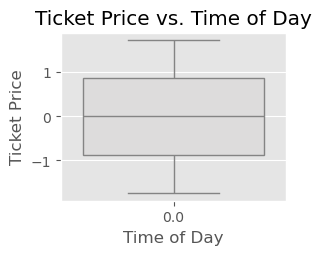

In [38]:
# Check if 'time_of_day' column exists before plotting
if 'time_of_day' in df.columns and 'ticket_price' in df.columns:
    plt.subplot(2, 2, 1)
    sns.boxplot(x=df['time_of_day'], y=df['ticket_price'], palette='coolwarm')
    plt.title("Ticket Price vs. Time of Day")
    plt.xlabel("Time of Day")
    plt.ylabel("Ticket Price")

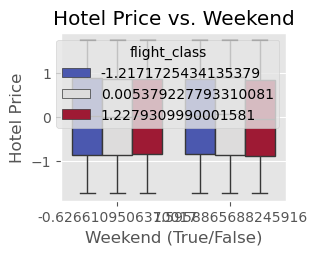

In [39]:
# Check if 'is_weekend' column exists before plotting
if 'is_weekend' in df.columns and 'hotel_price' in df.columns:
    plt.subplot(2, 2, 2)
    sns.boxplot(x=df['is_weekend'], y=df['hotel_price'], hue=df['flight_class'] if 'flight_class' in df.columns else None, palette='coolwarm')
    plt.title("Hotel Price vs. Weekend")
    plt.xlabel("Weekend (True/False)")
    plt.ylabel("Hotel Price")

C:\Users\meets\AppData\Local\Temp\ipykernel_16904\4125128555.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['dynamic_pricing_suggestion'], palette='viridis')


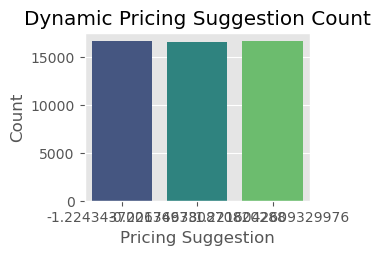

In [40]:
# Check if 'dynamic_pricing_suggestion' column exists before plotting
if 'dynamic_pricing_suggestion' in df.columns:
    plt.subplot(2, 2, 3)
    sns.countplot(x=df['dynamic_pricing_suggestion'], palette='viridis')
    plt.title("Dynamic Pricing Suggestion Count")
    plt.xlabel("Pricing Suggestion")
    plt.ylabel("Count")

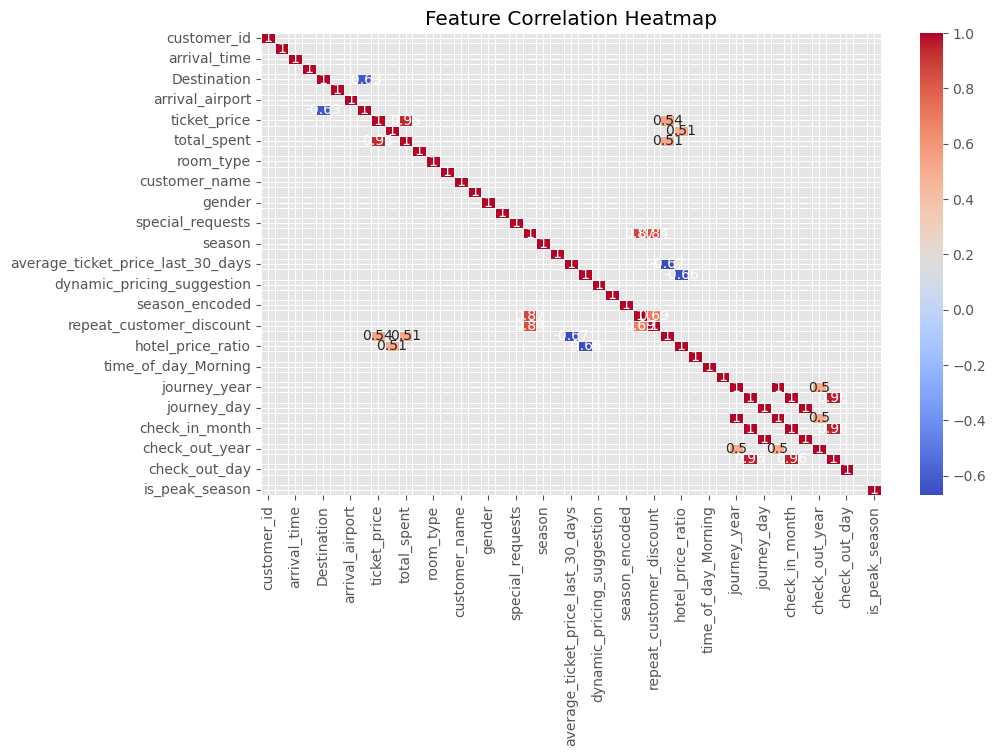

In [41]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))

# Select only numeric columns to avoid errors
numeric_df = df.select_dtypes(include=['number'])  # Filter only numeric columns

# Compute correlation
corr = numeric_df.corr()

# Generate heatmap for strong correlations (above 0.5)
sns.heatmap(corr[corr.abs() > 0.5], annot=True, cmap='coolwarm', linewidths=0.5)  
plt.title("Feature Correlation Heatmap")

plt.show()

In [42]:
# Model Training Section
print("\nStarting Model Training...")



Starting Model Training...


In [43]:
# Prepare Data for XGBoost
if 'ticket_price' in df.columns:
    X = df.drop(columns=['ticket_price'])  # Assuming 'ticket_price' is the target variable
    y = df['ticket_price']

In [44]:
# Feature Selection
selector = SelectKBest(score_func=f_regression, k='all')
# Ensure only numeric columns are used for feature selection
X_numeric = X.select_dtypes(include=[np.number])
X_selected = selector.fit_transform(X_numeric, y)

In [45]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [46]:
# Hyperparameter Tuning
param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [4, 6, 8],
        'subsample': [0.8, 1.0]
    }

In [47]:
# Create base model (without early stopping)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

In [48]:
# Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [49]:
# Copy best parameters and remove conflicting ones
best_params = grid_search.best_params_.copy()

# Remove 'objective' and 'eval_metric' to prevent duplication
best_params.pop("objective", None)
best_params.pop("eval_metric", None)

# ✅ Pass early_stopping_rounds in the constructor instead of fit()
best_model = xgb.XGBRegressor(
    **best_params,
    objective="reg:squarederror",  # Explicitly set objective
    eval_metric="rmse",  # Evaluation metric
    early_stopping_rounds=10  # ✅ Move here instead of fit()
)

# Train the model
best_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Still pass validation set here
    verbose=False
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
best_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Keep validation set
    verbose=False
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
y_pred = best_model.predict(X_test)

# Calculate RMSE & R² Score
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse}")
print(f"✅ R² Score: {r2}")

✅ RMSE: 0.008831312698636183
✅ R² Score: 0.9999220508461893


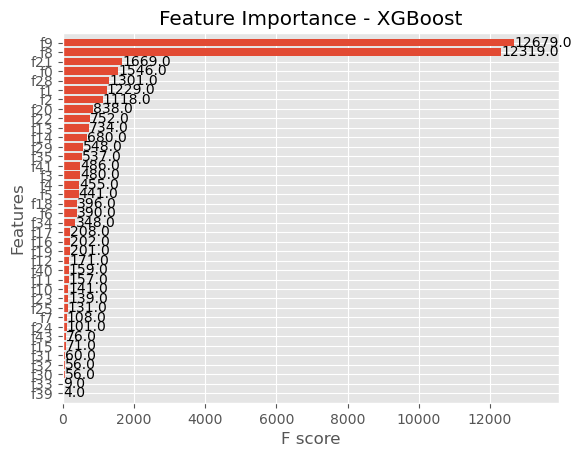

In [52]:
xgb.plot_importance(best_model, importance_type='weight', height=0.8)
plt.title("Feature Importance - XGBoost")
plt.show()

In [53]:
import joblib
joblib.dump(best_model, "xgboost_model.pkl")
print("🎯 Model saved as xgboost_model.pkl")

🎯 Model saved as xgboost_model.pkl


In [54]:
import pandas as pd

# Load the existing dataset
df = pd.read_csv("final_data.csv")

# Ensure 'ticket_price' exists
if 'ticket_price' not in df.columns:
    raise ValueError("❌ 'ticket_price' column not found in final_data.csv!")

# Select last 10% of data as unseen (assuming it wasn’t used in training)
df_unseen = df.iloc[int(len(df) * 0.9):].drop(columns=['ticket_price'])

# Save unseen data as new dataset
df_unseen.to_csv("new_dataset.csv", index=False)

print("✅ Extracted last 10% of data as new_dataset.csv!")


✅ Extracted last 10% of data as new_dataset.csv!
